In [1]:
"""
Name: Austin D. Fern
Course: MAE 6226: Aero/Hydro
Due Date: 12 February 2020
""";

In [2]:
# Library Imports
import numpy as np
import os
from matplotlib import pyplot
%matplotlib inline
notebook_path = os.path.abspath("Assignment_1-working.ipynb")

In [3]:
# Test Cell
x_val = np.loadtxt('NACA0012_x.txt')
y_val = np.loadtxt('NACA0012_y.txt')
sigma = np.loadtxt('NACA0012_sigma.txt')

In [4]:
# Mesh Characteristics
N = 51                                # Number of points in each direction
x_start, x_end = -1.0, 2.0            # x-direction boundaries
y_start, y_end = -0.5, 0.5            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

u_inf = 1.0                           # free-stream velocity

u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_free = u_inf * Y

Text(0, 0.5, '$y$')

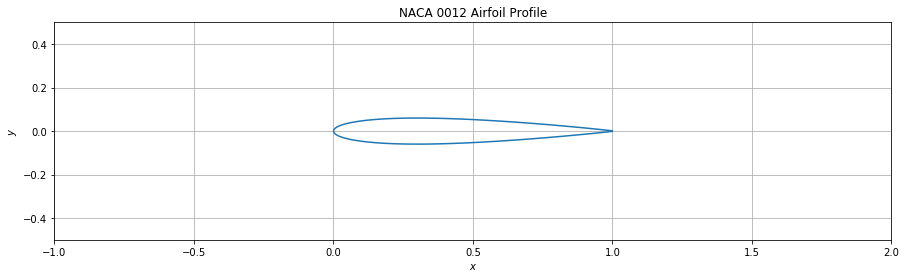

In [5]:
# Plotting the Airfoil w/ Given Data
pyplot.figure(figsize=(15,4))
pyplot.plot(x_val, y_val)
pyplot.grid()
pyplot.title('NACA 0012 Airfoil Profile')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')

In [6]:
def get_uv(sigma, u, v, x_source, y_source, X,Y):
    """
    Function to determine the u and v velocity components
    Parameters
    ---------
    strength = strength of source or sink
    xs, ys = x and y location of the source/sink
    X, Y = the mesh grid of the domain
    """
    u_values = [v.copy()] #creates an empty array to store the u_values in
    v_values = [v.copy()]
    for n in range(0, 100): # for loop to iterate through all values inside data value
        u = sigma[n] / (2*np.pi) * (X - x_source[n])/((X - x_source[n])**2 + (Y - y_source[n])**2)
        v = sigma[n] / (2*np.pi) * (Y - y_source[n])/((X - x_source[n])**2 + (Y - y_source[n])**2)
    
        u_values.append(u) #appending the empty array to store the new values of u
        v_values.append(v)
    
    return u_values, v_values

In [7]:
u_source, v_source = get_uv(sigma, u_freestream, v_freestream, x_val, y_val, X, Y) # assigning variables to the values of source

In [8]:
# np.sum is necessary to flatten the array of u_source into a 2d array. This prepares it to be plotted. 
u_free = np.sum(u_source, axis=0)
v_free = np.sum(v_source, axis=0)

u = u_free + u_freestream
v = v_free + v_freestream

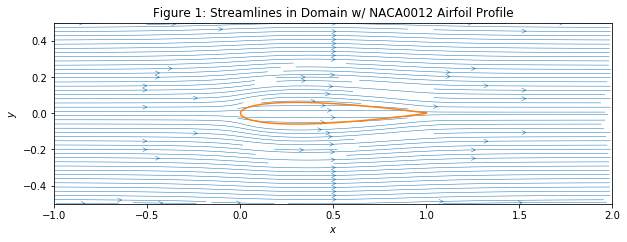

In [9]:
# Plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(False) # turns off the grid to better see streamliens around airfoil body
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Figure 1: Streamlines in Domain w/ NACA0012 Airfoil Profile')
pyplot.streamplot(X,Y,u,v,density=1.5,linewidth=0.5,arrowsize=1,arrowstyle='->')
pyplot.plot(x_val, y_val)

In [10]:
# Function to find the potential: inputs of strength, source location, and meshed grid
def get_phi(sigma, x_source, y_source, X, Y):
    phi_array = [np.zeros((51, 51))]
    for n in range(0, 100):
        phi = (sigma[n] / (2*np.pi)) * (X-x_source[n]) / ((X-x_source[n])**2 + (Y-y_source[n])**2)
        phi_array.append(phi)
    return phi_array

In [11]:
my_phi = get_phi(sigma, x_val, y_val, X, Y)
phi_final = np.sum(my_phi, axis=0) #performing np.sum again to flatten the array

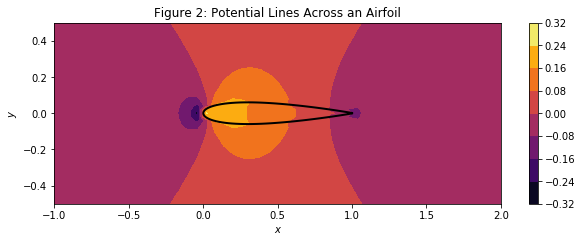

In [12]:
# Plotting the Potential Lines Across the airfoil profile
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(False)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contourf(X,Y,phi_final,cmap='inferno')
pyplot.colorbar(cmap='hsv', extend='both')
pyplot.title("Figure 2: Potential Lines Across an Airfoil")
pyplot.plot(x_val, y_val, color='k', linewidth = 2)

In [13]:
# Coefficient of Pressure 
c_p = 1.0 - (u**2 + v**2) / (u_inf**2)
max_cp_index = np.argmax(c_p)

max_cp_loc = np.unravel_index(max_cp_index, (N, N))
max_cp = c_p[max_cp_loc]

# Mapping the location of maximum pressure coefficient to the meshed grid 
# and assigning them values to plot
x_cp = X[max_cp_loc]
y_cp = Y[max_cp_loc]

Text(0.5, 1.0, 'Figure 3: Pressure Coefficienty Distribution Plot w/ Marker of Maximum $C_p$')

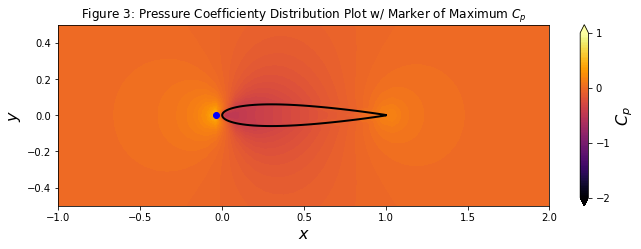

In [14]:
# Plotting C_p
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, c_p,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both', cmap='inferno')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.plot(x_val, y_val, color='k', linewidth = 2)
pyplot.plot(x_cp, y_cp, color='blue', marker='o')
pyplot.title('Figure 3: Pressure Coefficienty Distribution Plot w/ Marker of Maximum $C_p$')

## Answers to Questions in Problem Statement

### 1. What is the value of maximum pressure coefficient, $C_p$

In [15]:
print('The value of maximum pressure is: {}'.format(max_cp))

The value of maximum pressure is: 0.4714436613316241


### 2. What are the array indices for the maximum value of $C_p$

In [16]:
print('The location of maximum C_p in array index format is: {}'.format(max_cp_loc))

The location of maximum C_p in array index format is: (25, 16)


### 3. Please see the figures 1-3 above to see the stream lines, potential lines, and pressure coefficient distribution

### 1. Do the streamlines look like you expected?
#### Yes they do, the streamlines flow around the domain of the NACA airfoil.

### 2. What does the distribution of pressure tell you about lift generated by the airfoil?
#### Since this is a symmetric airfoil, no lift is generated at 0 angle of attack, this can also be seen in the pressure distribution figure as the pressure is evenly distributed around the domain of the airfoil.

### 3. Does the location of the point of maximum pressure seem right to you?
#### Yes, due to the airfoil's symmetry the point of maximum pressure should be just in front of the leading edge and not located anywhere else along the domain of the airfoil since no lift is generated by it at this angle of attack.